In [1]:
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import sys
import json
import gc


from __future__ import division

import nltk,re, pprint

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

bs = BeautifulSoup(urlopen('http://www.playbill.com/article/broadway-real-estate-com-321997'))
Theatres = DataFrame([{'name': a.getText(), 'url': a['href'], 'address': a.nextSibling[2:]} 
                      for a in bs.find_all("a") if a.has_attr('href') and '/venue/' in a['href']])

Shows = pd.read_csv('Shows.csv')

def getTags(url):
    bs = BeautifulSoup(urlopen('http://www.playbill.com' + url))
    return sorted(set([x.getText() for x in bs.find_all('h5', class_='bsp-bio-sub-text')]))

def getTagsFromBs(bs):
    return sorted(set([x.getText() for x in bs.find_all('h5', class_='bsp-bio-sub-text')]))

def seasonShows(season):
    seasonJson = json.loads(''.join(urlopen('http://www.playbill.com/ajax/loadProdSeason.jsp?year='+str(season)+'&start=0&limit=1000').readlines()))
    result = []
    for row in seasonJson['rows']:

        bs = BeautifulSoup(row)
        if (bs.find('a').has_attr('href')):
            result.append({'url':bs.find('a')['href'], 'title': bs.find('a').getText()})
    return result

def getProductionHtml(url):
    if (not url.startswith('http://www.playbill.com')):
        url = 'http://www.playbill.com' + url

    filename = 'production/' + url.split('/')[-1] + '.html' 

    if (not os.path.isfile(filename)):
        html = urlopen(url).read()
        f = open(filename, "w")
        f.write(html)
        f.close()
        print 'Wrote ' + filename
    else:
        print filename + ' already exists'

def getHtmlForYear(year):
    print 'Year: ' + str(year)
    [getProductionHtml(x) for x in list(Shows[Shows['year']==year]['url'])]
    
Shows['decade'] = 10 * (Shows['year'] // 10)
Shows['urlMinusVaultId'] = Shows['url'].apply(lambda url: '-'.join(url.split('-')[:-2]))
Shows['isMusical'] = Shows.tags.str.contains('Musical')
Shows['isComedy'] = Shows.tags.str.contains('Comedy')
Shows['isDrama'] = Shows.tags.str.contains('Drama')
Shows['isPlay'] = Shows.tags.str.contains('Play')


In [ ]:
BLOCK
tagsForUrl = {}

for year in range(1700,2018):
    print datetime.datetime.now()
    print year,
    for url in list(Shows[Shows['year'] == year]['url']):
        filename = (url + '.html')[1:]
        if (os.path.isfile(filename)):
            f = open(filename)
            bs = BeautifulSoup(f.read())
            f.close()
            tagsForUrl[url] = '/'.join(getTagsFromBs(bs))
            bs.decompose()
            gc.collect() #BeautifulSoup memory leak!!!! :(((
            print ".",
        else:
            print filename + ' not found'
    print
print datetime.datetime.now()

Shows.to_csv('Shows.csv',index=False,encoding='utf-8')

In [40]:
descriptionsForUrl = {}

for year in range(1700,2018):
    print datetime.datetime.now()
    print year,
    for url in list(Shows[Shows['year'] == year]['url']):
        filename = (url + '.html')[1:]
        if (os.path.isfile(filename)):
            f = open(filename)
            bs = BeautifulSoup(f.read())
            f.close()
            descriptionsForUrl[url] = [meta['content'] for meta in bs.find_all('meta') if meta.has_attr('name') and meta['name'] == 'description'][0]
            bs.decompose()
            gc.collect() #BeautifulSoup memory leak!!!! :(((
            print ".",
        else:
            print filename + ' not found'
    print
print datetime.datetime.now()

descriptionsForUrl

 2018-04-05 23:19:36.947981
1700
2018-04-05 23:19:36.952597
1701
2018-04-05 23:19:36.954783
1702
2018-04-05 23:19:36.956848
1703
2018-04-05 23:19:36.958826
1704
2018-04-05 23:19:36.961081
1705
2018-04-05 23:19:36.963100
1706
2018-04-05 23:19:36.964933
1707
2018-04-05 23:19:36.967282
1708
2018-04-05 23:19:36.970625
1709
2018-04-05 23:19:36.973724
1710
2018-04-05 23:19:36.975520
1711
2018-04-05 23:19:36.977193
1712
2018-04-05 23:19:36.978459
1713
2018-04-05 23:19:36.979981
1714
2018-04-05 23:19:36.982091
1715
2018-04-05 23:19:36.985092
1716
2018-04-05 23:19:36.987266
1717
2018-04-05 23:19:36.989341
1718
2018-04-05 23:19:36.991970
1719
2018-04-05 23:19:36.993831
1720
2018-04-05 23:19:36.995556
1721
2018-04-05 23:19:36.997115
1722
2018-04-05 23:19:36.998658
1723
2018-04-05 23:19:37.000826
1724
2018-04-05 23:19:37.003549
1725
2018-04-05 23:19:37.005461
1726
2018-04-05 23:19:37.007032
1727
2018-04-05 23:19:37.008382
1728
2018-04-05 23:19:37.009987
1729
2018-04-05 23:19:37.012069
1730
2018-04

{'/production/artists-and-models-1927-winter-garden-theatre-vault-0000011620': '',
 '/production/intimate-relations-ambassador-theatre-vault-0000001087': '',
 '/production/the-good-body-booth-theatre-vault-0000001662': 'Playwright Eve Ensler (The Vagina Monologues) stars in her own one-woman show, based on\r\ninterviews with women around the world on how they manipulate their bodies to look\r\nbeautiful.',
 '/production/naughty-naught-00-knickerbocker-theatre-vault-0000000522': 'A Yale student tries to undermine a champion rower by plying him with spiked drinks and getting a vamp to flirt with him in front of his beloved, in this musical homage to innocent college fun in the early 20th century.',
 '/production/faust-center-theatre-vault-0000013201': '',
 '/production/red-hands-woods-museum-and-metropolitan-vault-0000012838': '',
 '/production/wang-broadway-theatre-vault-0000002270': '',
 '/production/the-33rd-annual-tony-awards-1979-shubert-theatre-vault-0000013914': '',
 '/production/

In [5]:
Shows

,title,url,year,tags,decade,urlMinusVaultId,isMusical,isComedy,isDrama,isPlay
0,The Recruiting Officer,/production/the-recruiting-officer-new-theatre...,1732,Broadway/Original/Play,1730,/production/the-recruiting-officer-new-theatre,False,False,False,True
1,The Mock Doctor,/production/the-mock-doctor-nassau-street-thea...,1749,Broadway/Original/Play,1740,/production/the-mock-doctor-nassau-street-theatre,False,False,False,True
2,The Devil to Pay,/production/the-devil-to-pay-nassau-street-the...,1749,Broadway/Drama/Original,1740,/production/the-devil-to-pay-nassau-street-the...,False,False,True,False
3,Damon and Phillida,/production/damon-and-phillida-nassau-street-t...,1749,Broadway/Musical/Opera/Original,1740,/production/damon-and-phillida-nassau-street-t...,True,False,False,False
4,Richard III,/production/king-richard-iii-nassau-street-the...,1749,Broadway/Original/Play,1740,/production/king-richard-iii-nassau-street-the...,False,False,False,True
5,Spanish Friar,/production/spanish-friar-nassau-street-theatr...,1749,Broadway/Original/Play,1740,/production/spanish-friar-nassau-street-theatre,False,False,False,True
6,The Orphan,/production/the-orphan-nassau-street-theatre-v...,1749,Broadway/Original/Play,1740,/production/the-orphan-nassau-street-theatre,False,False,False,True
7,The Stage Coach,/production/the-stage-coach-nassau-street-thea...,1750,Broadway/Original/Play,1750,/production/the-stage-coach-nassau-street-theatre,False,False,False,True
8,Love for Love,/production/love-for-love-nassau-street-theatr...,1750,Broadway/Comedy/Original/Play,1750,/production/love-for-love-nassau-street-theatre,False,True,False,True
9,The Recruiting Officer,/production/the-recruiting-officer-nassau-stre...,1750,Broadway/Play,1750,/production/the-recruiting-officer-nassau-stre...,False,False,False,True


In [ ]:
print len(Shows[Shows.tags.str.contains('Original')])
print len(Shows)

In [ ]:
Shows['urlMinusVaultId'] = Shows['url'].apply(lambda url: '-'.join(url.split('-')[:-2]))

Originals = Shows[Shows.tags.str.contains('Original')]
Originals.groupby('year').nunique()[['urlMinusVaultId']].plot.bar(figsize=(30,5))

In [ ]:
Shows['decade'] = 10 * (Shows['year'] // 10)

In [15]:
nltk.FreqDist(list(Shows.tags)).most_common()

[('Broadway/Original/Play', 2683),
 ('Broadway/Musical/Original', 1676),
 ('Broadway/Comedy/Original', 1170),
 ('Broadway/Drama/Original', 984),
 ('Broadway/Original', 670),
 ('Broadway/Comedy/Original/Play', 570),
 ('Broadway', 465),
 ('Broadway/Drama/Original/Play', 409),
 ('Broadway/Play', 396),
 ('Broadway/Original/Revue', 342),
 ('Broadway/Comedy', 336),
 ('Broadway/Musical', 335),
 ('Broadway/Drama', 229),
 ('Broadway/Comedy/Musical/Original', 194),
 ('Broadway/Original/Special', 141),
 ('Broadway/Drama/Play', 136),
 ('Broadway/Comedy/Play', 131),
 ('Broadway/Opera/Original', 110),
 ('Broadway/Musical/Original/Revue', 106),
 ('Broadway/Farce/Original', 101),
 ('Broadway/Operetta/Original', 83),
 ('Broadway/Concert/Original', 64),
 ('Broadway/Farce/Original/Play', 59),
 ('Broadway/One Act/Original', 55),
 ('Broadway/One Act/Original/Play', 54),
 ('Broadway/Comedy/Musical/Operetta', 51),
 ('Broadway/Tragedy', 50),
 ('Broadway/Original/Solo', 47),
 ('Broadway/Dance/Original', 44),
 

In [18]:
keep_tags = [x for (x,_) in nltk.FreqDist(list(Shows.tags)).most_common()][:8]

Shows['tags_simplified'] = Shows.tags.apply(lambda tag: tag if tag in  keep_tags else 'Other')

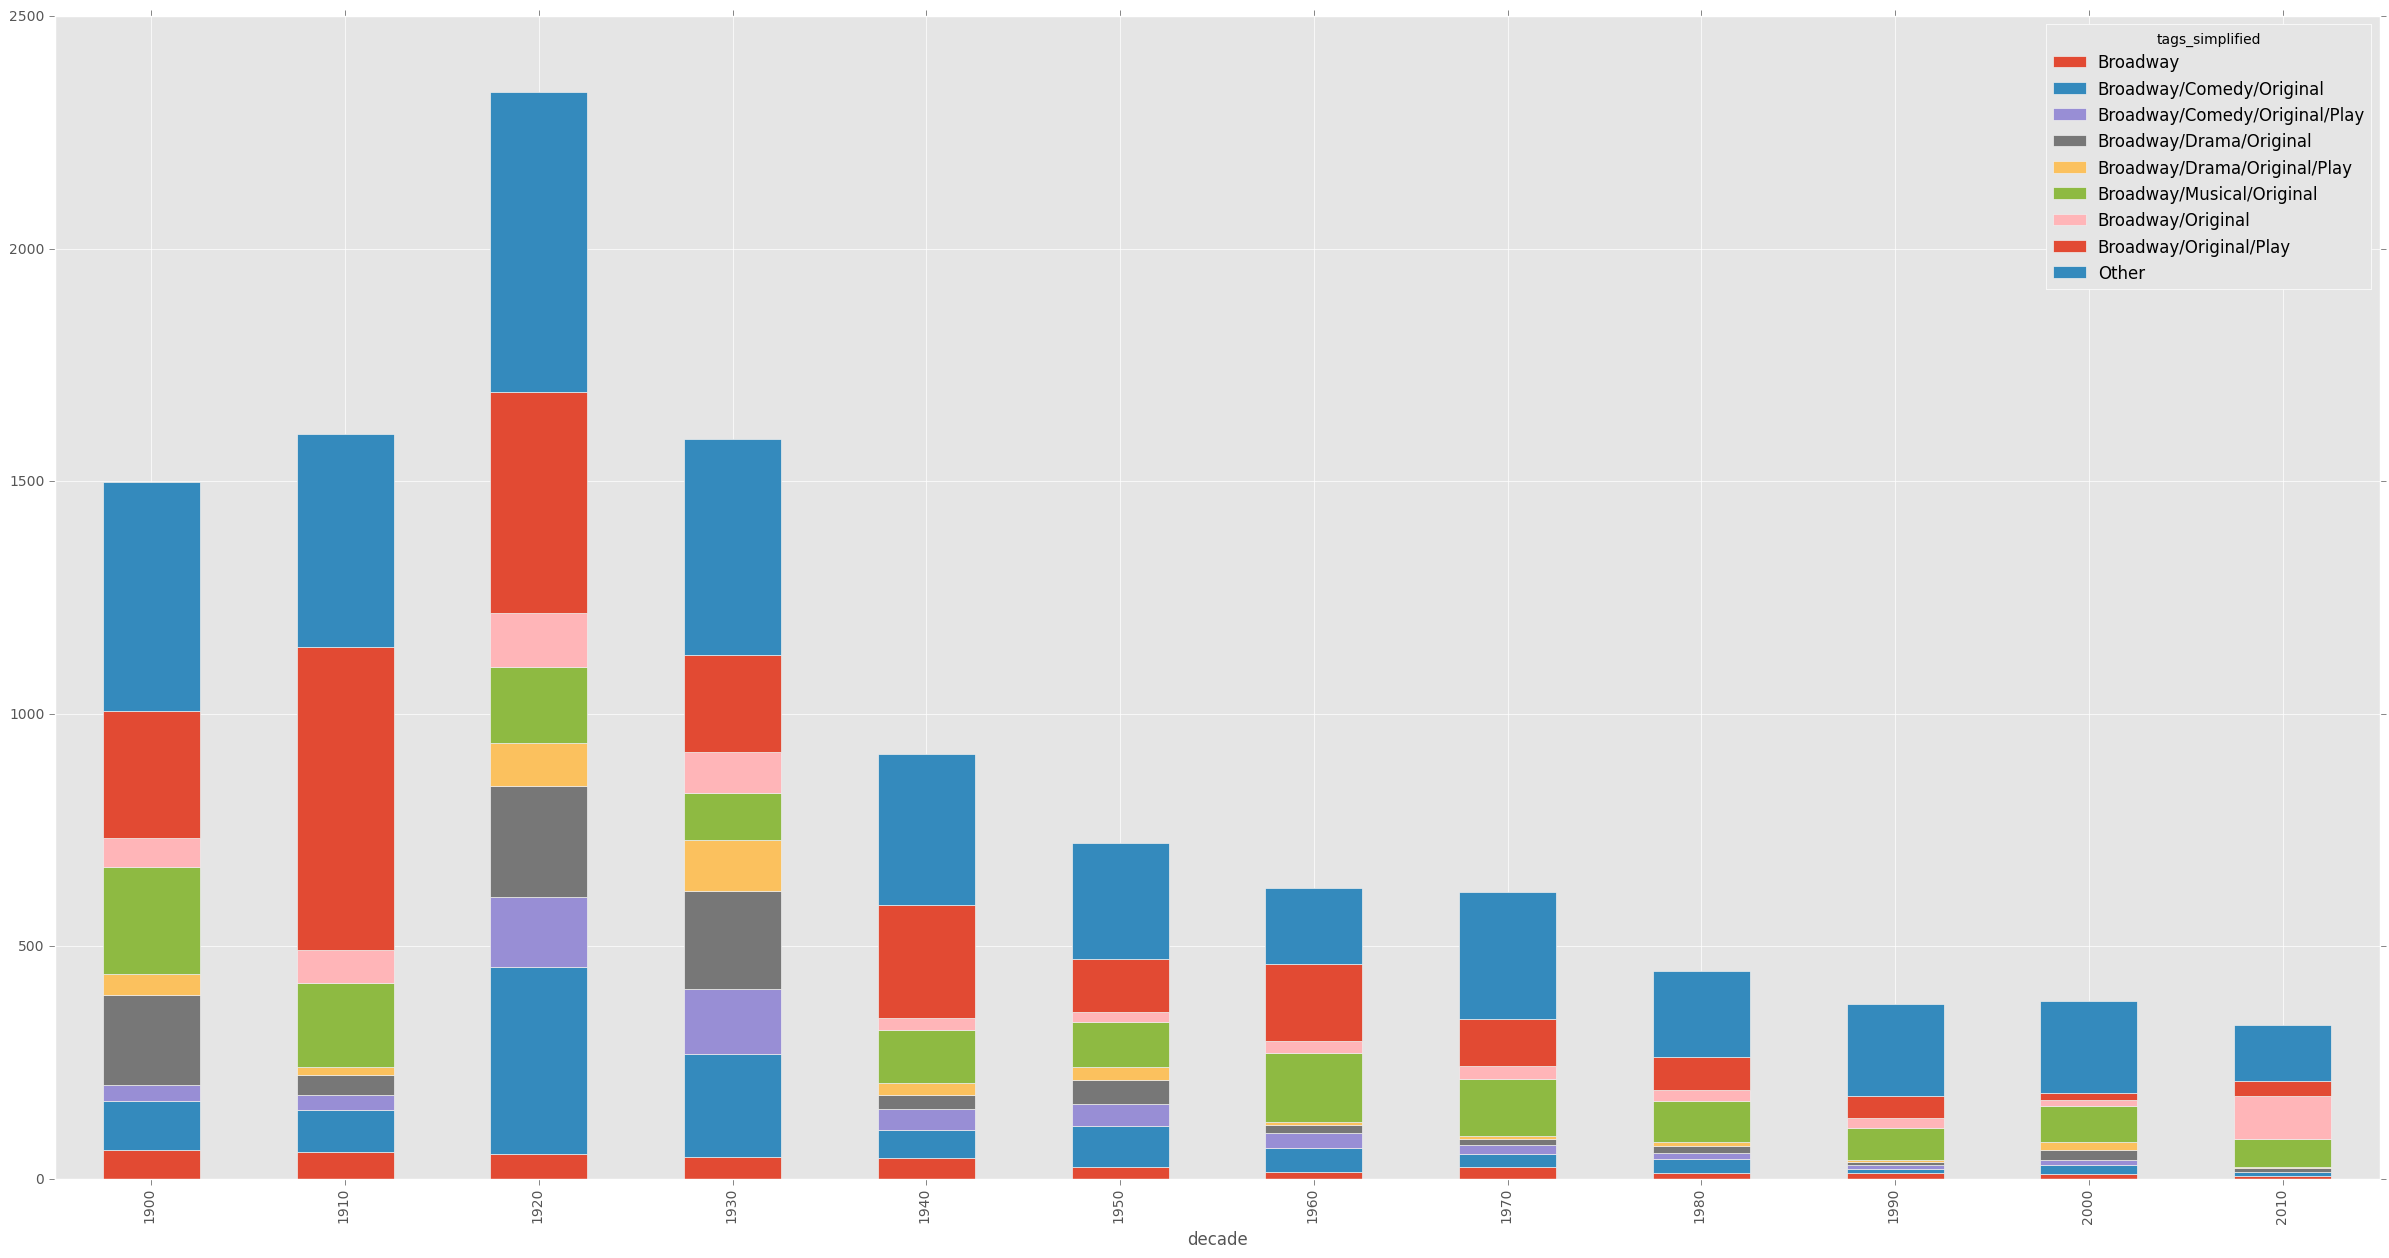

In [19]:
Shows[(Shows.year>1900)].groupby(['decade','tags_simplified']).nunique()['urlMinusVaultId'].unstack().plot.bar(stacked=True,figsize=(30,15))


In [ ]:
t = Shows[(Shows.year>1900)] \
    .groupby(['decade','isComedy']).nunique()['urlMinusVaultId'].unstack() #.plot.bar(stacked=True,figsize=(30,15))
t['Total'] = t.sum(axis=1)

DataFrame(t[True] / t['Total']).plot.bar(figsize=(30,15))

In [ ]:
Shows[(Shows.year>1900)].groupby(['decade','isMusical']).nunique()['urlMinusVaultId'].unstack().plot.bar(stacked=True,figsize=(30,15))

In [ ]:
Shows[~Shows.isMusical]

In [ ]:
t = Shows[(Shows.year>1900) & (Shows.tags.isin(['Broadway/Original/Play','Broadway/Musical/Original','Broadway/Comedy/Original','Broadway/Drama/Original']))] \
    .groupby(['decade','tags']).nunique()['urlMinusVaultId'].unstack() #.plot.bar(stacked=True,figsize=(30,15))
    
t['Total'] = t.sum(axis=1)

for tag in ['Broadway/Original/Play','Broadway/Musical/Original','Broadway/Comedy/Original','Broadway/Drama/Original']:
    t[tag] = t[tag] / t['Total']
    
t[['Broadway/Musical/Original']].plot(figsize=(30,15))

In [ ]:
DataFrame(nltk.FreqDist(list(Shows[Shows.year.between(1920,1930)].tags)).most_common()).set_index(0)[1].plot.pie()

In [ ]:
Shows[Shows.tags.str.contains('Theatrical Experience')]['url'][12824]

In [ ]:
Shows[Shows.tags.str.contains('Musical')].groupby('year').nunique()[['urlMinusVaultId']].plot.bar(figsize=(30,5))

In [ ]:
Shows[Shows.tags.str.contains('Thriller')]

In [48]:
Shows['description'] = Shows.url.apply(lambda url: descriptionsForUrl[url])
Shows.to_csv('Shows.csv',index=False,encoding='utf-8')

In [49]:
Shows[Shows.description.str.len() == 907]

,title,url,year,tags,decade,urlMinusVaultId,isMusical,isComedy,isDrama,isPlay,tags_simplified,description
12876,Mean Girls,/production/mean-girls-august-wilson-theatre-2...,2017,Broadway/Musical/Original,2010,/production/mean-girls-august-wilson-theatre,True,False,False,False,Broadway/Musical/Original,Mean Girls is now a ferociously funny new musi...


In [77]:
descriptions = '\n'.join(list(set(Shows[(Shows.description.str.len() > 0)&(Shows.isComedy)].description)))
comedyCol = nltk.Text(nltk.word_tokenize(descriptions)).collocations()
descriptions = '\n'.join(list(set(Shows[(Shows.description.str.len() > 0)&(Shows.isDrama)].description)))
dramaCol = nltk.Text(nltk.word_tokenize(descriptions)).collocations()
descriptions = '\n'.join(list(set(Shows[(Shows.description.str.len() > 0)&(Shows.isMusical)].description)))
musicalCol = nltk.Text(nltk.word_tokenize(descriptions)).collocations()
descriptions = '\n'.join(list(set(Shows[(Shows.description.str.len() > 0)&(Shows.isPlay)].description)))
playCol = nltk.Text(nltk.word_tokenize(descriptions)).collocations()

New York; Neil Simon; Bernard Shaw; World War; George Bernard; Fumed
Oak; married couple; William Shakespeare; musical adaptation; Jackie
Mason; one-act plays; Noel Coward; Pulitzer Prize-winning; Hands
Across; Red Peppers; San Francisco; Shadow Play; dark comedy; Still
Life; Greenwich Village
Pulitzer Prize-winning; World War; Lillian Hellman; Tennessee
Williams; Prize-winning play; Eugene O'Neill; Henrik Ibsen; New York;
would rather; August Strindberg; Edward Albee; Giacomo Puccini; Oscar
Wilde; Pulitzer Prize; Anton Chekhov; mental illness; must deal;
unrequited love; New Orleans; Tony Award-winning
musical adaptation; New York; World War; York City; Best Musical; Tony
Award; Andrew Lloyd; Betty Comden; Tony Awards; Adolph Green; Alan
Jay; Jay Lerner; Pulitzer Prize-winning; New Orleans; Joseph Stein;
Pulitzer Prize; Kurt Weill; Lloyd Webber; Award nominee; Stephen
Sondheim
World War; New York; Pulitzer Prize-winning; one-act plays; William
Shakespeare; Tennessee Williams; Tom Stop

In [78]:
comedyCol

In [ ]:
print len(set(Originals[Originals.year > 1970]['url'].apply(lambda url: '-'.join(url.split('-')[:-2]))))
print len(Originals[Originals.year > 1970]['url'])

In [ ]:
[getHtmlForYear(y) for y in range(1700,2018)]

In [ ]:
bss = [BeautifulSoup(urlopen(url)) for url in list(Theatres['url'])]

In [ ]:
nltk.Text(nltk.word_tokenize(''.join(theaterDescriptions))).collocations()

In [ ]:
theaterDescriptions = []

for i in range(39):    
    print i
    
    try:
        bs = bss[i]

        bspBio = bs.find('div', class_='bsp-bio')

        bspBioTitle = bspBio.find('h2', class_='bsp-bio-title').getText()

        print bspBioTitle

        bspBioText = ''
        bspBioFullTextUrl = ''
        if (bspBio.find('div', class_='bsp-bio-text')):
            bspBioText =  bspBio.find('div', class_='bsp-bio-text').getText('\n')
            if (bspBio.find('div', class_='bsp-bio-text').find('a')):
                if (bspBio.find('div', class_='bsp-bio-text').find('a').has_attr('href')):
                    bspBioFullTextUrl = bspBio.find('div', class_='bsp-bio-text').find('a')['href']

        bspBioLists =bspBio.find('div', class_='bsp-bio-lists')
        bspBioListPairs = [(re.sub(':$', '', li.find('span').getText()), li.find('span').nextSibling) for li in bspBioLists.find_all('li')]


        print bspBioText
        theaterDescriptions.append(bspBioText)
        
        print bspBioFullTextUrl
        print bspBioListPairs
    except:
        print("Unexpected error:", sys.exc_info()[0])

In [ ]:
t = DataFrame(theaterDescriptions)
t[0]=t[0].str.strip()
t.to_csv('theaterDescriptions.csv',index=False,encoding='utf-8')


In [ ]:
text = nltk.word_tokenize(theaterDescriptions[10])
nltk.pos_tag(text)

In [ ]:
season2017 = json.loads(''.join(urlopen('http://www.playbill.com/ajax/loadProdSeason.jsp?year=2017&start=0&limit=1000').readlines()))


In [ ]:


Shows = DataFrame([{'year': year, 'url': x['url'], 'title': x['title']}  for year in range(1701,2018) for x in seasonShows(year)])

Shows['title'] = Shows['title'].str.strip()



In [ ]:
print len(Shows.groupby('url').count())
print len(Shows)

In [ ]:
list(Shows[Shows['url'].str.contains('carousel')]['url'])

In [ ]:
carousels

In [ ]:
url =  '/production/carousel-2017-2018'

url = 'http://www.playbill.com' + url

bs = BeautifulSoup(urlopen(url))

In [ ]:
tags = [getTags(url) for url in list(Shows['url'])]

In [ ]:
getTags('/production/carousel-2017-2018')

In [ ]:
carousels= list(Shows[Shows['url'].str.contains('carousel')]['url'])

In [ ]:
previousShows = 'http://www.playbill.com/ajax/loadVenueShow.jsp?id=00000150-aa9f-d8be-af71-ffbf689b0003&start=0&limit=1000&venue=00000150-aacd-d8be-af71-ffef18860005'

In [ ]:
url='http://www.playbill.com/production/carousel-2017-2018'
bs = BeautifulSoup(urlopen(url))

[json.loads(x['data-bsp-carousel-options'])['themeConfig']['dynamicSlideLoadNextUrl'] for x 
 in bs.find_all('div', class_='gallery-module gallery-module-horizontal')]

In [ ]:
url='http://www.playbill.com/venue/imperial-theatre-vault-0000000201'
bs = BeautifulSoup(urlopen(url))

[json.loads(x['data-bsp-carousel-options'])['themeConfig']['dynamicSlideLoadNextUrl'] for x 
 in bs.find_all('div', class_='gallery-module gallery-module-horizontal')]

In [ ]:
url='http://www.playbill.com/production/carousel-2017-2018'
bs = BeautifulSoup(urlopen(url))

In [ ]:
getProductionHtml('http://www.playbill.com/production/carousel-2017-2018')


In [ ]:
str(urlopen(url))

In [ ]:
url.startswith('http://www.playbill.com/')

In [ ]:
f = open('production/my-fair-lady-uris-theatre-vault-0000011053.html', "r")
bs = BeautifulSoup(f.read())
f.close()

bs

In [ ]:
[json.loads(x['data-bsp-carousel-options'])['themeConfig']['dynamicSlideLoadNextUrl'] for x 
 in bs.find_all('div', class_='gallery-module gallery-module-horizontal')]

In [ ]:
getTagsFromBs(bs)